In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
#Read data
df_all = pd.read_csv("train.csv")

In [651]:
#Data size
df_all.count()['id']

"\n#Data size\ndf_all.count()['id']\n"

In [652]:
#Data size with click=1
df_all[df_all.click == 1].count()['id']

"\n#Data size with click=1\ndf_all[df_all.click == 1].count()['id']\n"

Preprocessing

In [3]:
#Down sampling
df_0 = df_all[df_all.click == 0].sample(n=6865066, random_state=123)

In [4]:
#Get the balanced dataset
df_down = pd.concat([df_0, df_all[df_all.click == 1]])

In [6]:
#Partition the data into train and test
X_train, X_test, y_train, y_test = train_test_split(df_down.drop('click', axis=1), df_down['click'], test_size=0.2, random_state=123)
df_train = pd.concat([y_train, X_train], axis=1)
df_test = pd.concat([y_test, X_test], axis=1)

In [3]:
#Random subset a sample from train or test data 
#df = df_train.sample(n=100000, random_state=5)
#df = df_test.sample(n=100000, random_state=1) 
df = df_all.sample(n=100000, random_state=1)

In [21]:
#Check feature type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 8768124 to 40339515
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   click             100000 non-null  int64 
 1   hour              100000 non-null  object
 2   C1                100000 non-null  object
 3   banner_pos        100000 non-null  object
 4   site_id           100000 non-null  object
 5   site_domain       100000 non-null  object
 6   site_category     100000 non-null  object
 7   app_id            100000 non-null  object
 8   app_domain        100000 non-null  object
 9   app_category      100000 non-null  object
 10  device_model      100000 non-null  object
 11  device_type       100000 non-null  object
 12  device_conn_type  100000 non-null  object
 13  C14               100000 non-null  object
 14  C15               100000 non-null  object
 15  C16               100000 non-null  object
 16  C17               100000 non-n

In [658]:
#Check null values (if dataset is too large and can not check by info method)
for col in df.columns:
    print(df[df[col].isna()==True][col])

'\n#Check null values (if dataset is too large and can not check by info method)\nfor col in df.columns:\n    print(df[df[col].isna()==True][col])\n'

In [659]:
#How many unique values for each feature
for col in df.columns:
    print(col, df[col].nunique())

'\n#How many unique values for each feature\nfor col in df.columns:\n    print(col, df[col].nunique())\n'

In [4]:
#Drop unuseful feature (All or most unique categories)
df.drop('id', inplace=True, axis=1)
df.drop('device_id', inplace=True, axis=1)
df.drop('device_ip', inplace=True, axis=1)

In [5]:
#Function for generating date from feature hour
def get_date(hour):
    y = '20' + str(hour)[:2]
    m = str(hour)[2:4]
    d = str(hour)[4:6]
    return y + '-' + m + '-' + d

In [6]:
#Create new feature weekday
df['weekday'] = pd.to_datetime(df.hour.apply(get_date)).dt.dayofweek.astype(str)

In [661]:
#Function for mapping time series data (By different days)
def hour_imputer(hour):
    if hour < 14102200:
        return hour-14102100+1
    elif hour < 14102300:
        return hour-14102200+1+24*1
    elif hour < 14102400:
        return hour-14102300+1+24*2
    elif hour < 14102500:
        return hour-14102400+1+24*3
    elif hour < 14102600:
        return hour-14102500+1+24*4
    elif hour < 14102700:
        return hour-14102600+1+24*5
    elif hour < 14102800:
        return hour-14102700+1+24*6
    elif hour < 14102900:
        return hour-14102800+1+24*7
    elif hour < 14103000:
        return hour-14102900+1+24*8
    else:
        return hour-14103000+1+24*9

In [7]:
#Function for mapping time series data (By daytime intervals)
def hour_imputer2(hour):
    if str(hour)[-2:] == '00' or str(hour)[-2:] == '01':
        return '00-01'
    elif str(hour)[-2:] == '02' or str(hour)[-2:] == '03':
        return '02-03'
    elif str(hour)[-2:] == '04' or str(hour)[-2:] == '05':
        return '04-05'
    elif str(hour)[-2:] == '06' or str(hour)[-2:] == '07':
        return '06-07'
    elif str(hour)[-2:] == '08' or str(hour)[-2:] == '09':
        return '08-09'
    elif str(hour)[-2:] == '10' or str(hour)[-2:] == '11':
        return '10-11'
    elif str(hour)[-2:] == '12' or str(hour)[-2:] == '13':
        return '12-13'
    elif str(hour)[-2:] == '14' or str(hour)[-2:] == '15':
        return '14-15'
    elif str(hour)[-2:] == '16' or str(hour)[-2:] == '17':
        return '16-17'
    elif str(hour)[-2:] == '18' or str(hour)[-2:] == '19':
        return '18-19'
    elif str(hour)[-2:] == '20' or str(hour)[-2:] == '21':
        return '20-21'
    else:
        return '22-23'

In [8]:
#Map time series data
df['hour'] = df['hour'].apply(hour_imputer2)

In [9]:
#Convert categorical data to correct type
cat_list = ['C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 
       'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21']
for col in cat_list:
    df[col]= df[col].astype(str, copy=False)

In [10]:
#Get the mean click rate for each category for features with too many categories 
df_site_id = df_all[['site_id', 'click']].groupby('site_id').mean()['click']
print(1)
df_site_domain = df_all[['site_domain', 'click']].groupby('site_domain').mean()['click']
print(2)
df_app_id = df_all[['app_id', 'click']].groupby('app_id').mean()['click']
print(3)
df_app_domain = df_all[['app_domain', 'click']].groupby('app_domain').mean()['click']
print(4)
df_site_category = df_all[['site_category', 'click']].groupby('site_category').mean()['click']
print(5)
df_app_category = df_all[['app_category', 'click']].groupby('app_category').mean()['click']
print(6)
df_device_model = df_all[['device_model', 'click']].groupby('device_model').mean()['click']
print(7)
df_C14 = df_all[['C14', 'click']].groupby('C14').mean()['click']
print(8)
df_C17 = df_all[['C17', 'click']].groupby('C17').mean()['click']
print(9)
df_C19 = df_all[['C19', 'click']].groupby('C19').mean()['click']
print(10)
df_C20 = df_all[['C20', 'click']].groupby('C20').mean()['click']
print(11)
df_C21 = df_all[['C21', 'click']].groupby('C21').mean()['click']
print(12)

1
2
3
4
5
6
7
8
9
10
11
12


In [11]:
#Get the overall click rate
df_mean = df_all['click'].mean()

In [12]:
#Functions for mapping categories with corresponding mean click rate 
def mapper1(X):
    if X not in df_site_id.index:
        return df_mean
    else:
        return df_site_id[df_site_id.index == X].values[0]
def mapper2(X):
    if X not in df_site_domain.index:
        return df_mean
    else:
        return df_site_domain[df_site_domain.index == X].values[0]
def mapper3(X):
    if X not in df_app_id.index:
        return df_mean
    else:
        return df_app_id[df_app_id.index == X].values[0]
def mapper4(X):
    if X not in df_app_domain.index:
        return df_mean
    else:
        return df_app_domain[df_app_domain.index == X].values[0]
def mapper5(X):
    if X not in df_site_category.index:
        return df_mean
    else:
        return df_site_category[df_site_category.index == X].values[0]
def mapper6(X):
    if X not in df_app_category.index:
        return df_mean
    else:
        return df_app_category[df_app_category.index == X].values[0]
def mapper7(X):
    if X not in df_device_model.index:
        return df_mean
    else:
        return df_device_model[df_device_model.index == X].values[0]
def mapper8(X):
    if X not in df_C14.index:
        return df_mean
    else:
        return df_C14[df_C14.index == X].values[0]
def mapper9(X):
    if X not in df_C17.index:
        return df_mean
    else:
        return df_C17[df_C17.index == X].values[0]
def mapper10(X):
    if X not in df_C19.index:
        return df_mean
    else:
        return df_C19[df_C19.index == X].values[0]
def mapper11(X):
    if X not in df_C20.index:
        return df_mean
    else:
        return df_C20[df_C20.index == X].values[0]
def mapper12(X):
    if X not in df_C21.index:
        return df_mean
    else:
        return df_C21[df_C21.index == X].values[0]

In [13]:
target_list = ['site_id', 'site_domain', 'app_id', 'app_domain', 'site_category',
               'app_category', 'device_model', 'C14', 'C17', 'C19', 'C20', 'C21']
mapper_list = [mapper1, mapper2, mapper3,mapper4, mapper5, mapper6, 
               mapper7, mapper8, mapper9, mapper10, mapper11, mapper12]

In [14]:
#Map categories with corresponding mean click rate
for col, mapper in zip(target_list, mapper_list):
    df[col] = df[col].apply(mapper)
    print(col)

site_id
site_domain
app_id
app_domain
site_category
app_category
device_model
C14
C17
C19
C20
C21


In [15]:
df_list = [df_site_id, df_site_domain, df_app_id, df_app_domain, df_site_category,
       df_app_category, df_device_model, df_C14, df_C17, df_C19, df_C20, df_C21]

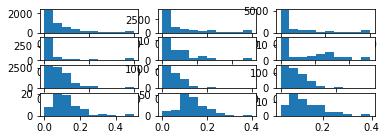

In [16]:
#Check the distribution of mean click rate for each target feature
for loc, df_temp in zip(range(12), df_list):
    plt.subplot(8, 3, loc+1)
    plt.hist(df_temp)
plt.show()

In [17]:
#Function for re-categorize data points by their mean click rates 
def ranker(rate):
    if rate <= df_mean - 0.04:
        return "very low"
    elif rate <= df_mean - 0.02:
        return "low"
    elif rate <= df_mean + 0.02:
        return "middle"
    elif rate <= df_mean + 0.04:
        return "high"
    else:
        return "very high"

In [18]:
#Re-categorize data points by their mean click rates 
for col in target_list:
    df[col] = df[col].apply(ranker)

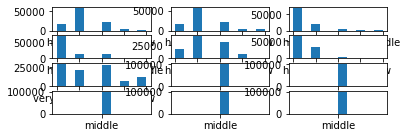

In [19]:
#Check the distribution of mean click rate for each target feature after re-categorized
for loc, features in zip(range(12), target_list):
    plt.subplot(8, 3, loc+1)
    plt.hist(df[features])
plt.show()

In [20]:
#Drop features with only one category 
df.drop(['C14', 'C17', 'C19', 'C20', 'C21'], axis=1, inplace=True)

In [21]:
#Check the final dataset
df.head()

,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_model,device_type,device_conn_type,C15,C16,C18,weekday
21250780,1,08-09,1005,0,high,high,high,high,high,high,very high,1,0,320,50,0,6
17358227,0,08-09,1005,0,high,high,high,high,high,high,very high,1,0,320,50,0,5
25035648,0,08-09,1005,0,very low,very low,very low,very low,very low,very low,very low,1,3,320,50,1,0
19418340,0,18-19,1005,1,very high,very high,middle,high,high,high,very high,1,0,320,50,3,5
26160847,0,16-17,1005,0,very low,very low,very low,very high,low,very low,middle,1,0,320,50,0,0


In [22]:
df.to_csv("df_test_0.csv", index=False)